### Preprocessing Totalseq A fastq files and QC

In [45]:
from cite_count import AB_count,RNA_count,CITE_count

In totalseq A, the 10X cell barcode and UMI are located in forward strand and antibody barcode is located in the reverse trand  ![alt text](./img/totalseq_A_AB.png "Totalseq A 3' capture")

In [46]:
# Input locations of forward and reverse strand fastq files (unzipped)
seq_f = './FASTQ/Totalseq_A_v3_R1_001.fastq'
seq_r = './FASTQ/Totalseq_A_v3_R2_001.fastq'
# Totalseq A antibody barcode
tag_list = './reference_file/Totalseq_A_list.csv'
# The sequence team will provide the antibody barcode they used for labeling
AB_list = ['TATCCCTTGGGATGG', 'TGTTCCCGCTCAACT', 'CTCCGAATCATGTTG','CAATCAGACCTATGA', 'GCTGCGCTTTCCATT', 'GTCCCTGCAACTTGA','TTTGTCCTGTACGCC']
# cache files will be stored in cache folder labled by the project name 
test_AB = AB_count(PROJ_NAME = 'TotalSeq_A_Test')

In [47]:
# Process fastq files; 
test_AB.process_fastq(seq_f,seq_r,tag_list,AB_list,overwrite = False)

0it [00:00, ?it/s]

Read forward sequene


3315859it [00:26, 123368.16it/s]
138it [00:00, 1109.97it/s]

Read reverse sequene


3315859it [00:55, 59364.14it/s]


Total reads per library = 3,315,859
Sequences removed by poly A filter = 2.659%
Reads removed by UMI filter = 43.069%
Total filtered UMI reads per library = 1,799,587
Reads with no ref tag in UMI counts = 3.787%
Reads recovered in UMI counts = 2.299%


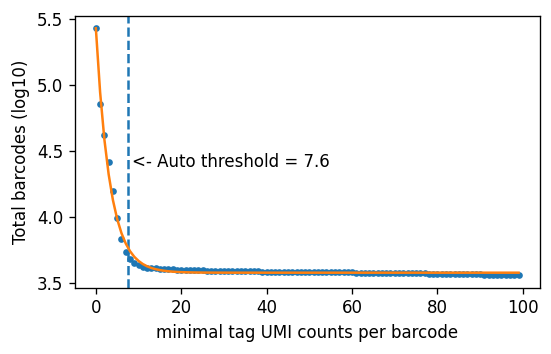

In [48]:
test_AB.qc_tag_count(dpi = 120,THRESHOLD_UMI = None, saturation='half')

select tag counts between 7.6 and 1438.5 (P = 1e-06)


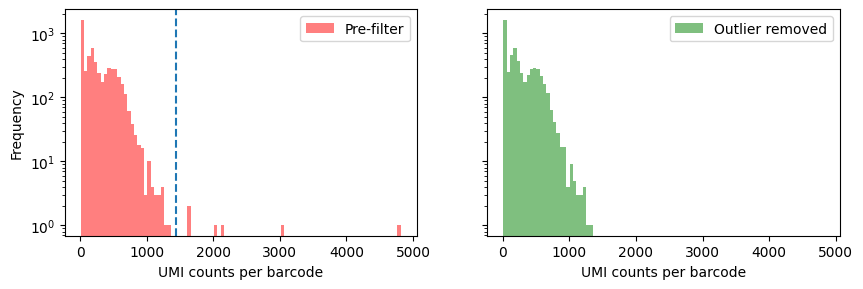

In [49]:
test_AB.filter_tag_count(dpi = 100,P_OUTLIER = 1e-6,view=True)

In [50]:
test_AB.get_tag_counts_table(filter_barcodes=True, overwrite=False)

100%|██████████| 5478/5478 [00:07<00:00, 721.26it/s]


Best model with Gaussian distribution has 2 populations with threshold at 20
Best model with Gaussian distribution has 2 populations with threshold at 24
Best model with Gaussian distribution has 3 populations with threshold at 7
Best model with Gaussian distribution has 2 populations with threshold at 9
Best model with Rayleigh distribution has 1 populations with threshold at 1
Best model with Gaussian distribution has 2 populations with threshold at 5
Best model with Rayleigh distribution has 1 populations with threshold at 1


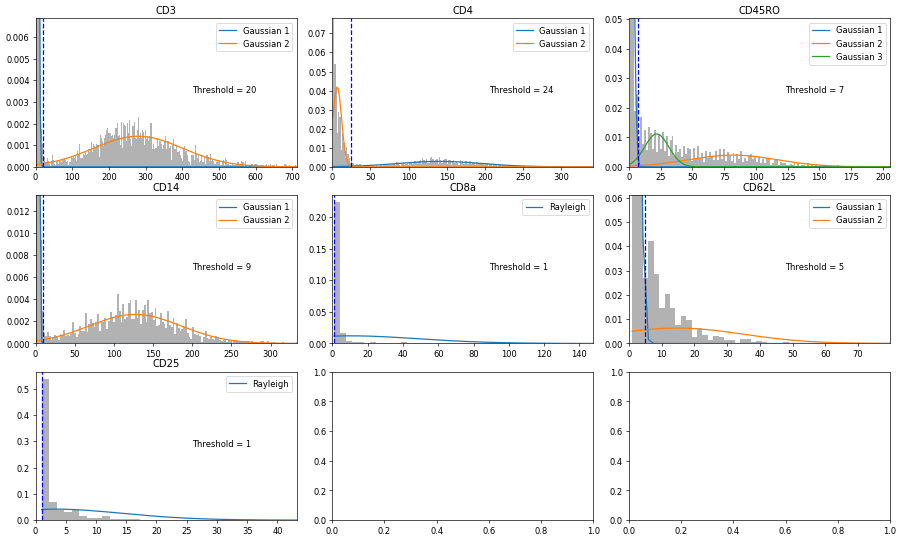

In [51]:
test_AB.qc_tag_label(max_population = 5, min_population_size = 0.2, confidence_interval = 0.95,dpi = 60,verbose=False,view = True)
test_AB.get_tag_label()

In [9]:
test_AB.df_merge_UMI_mx

AttributeError: 'AB_count' object has no attribute 'df_merge_UMI_mx'

In [5]:
test_AB.df_merge_UMI_mx.to_csv('CITE_Seq_Result.csv')